In [4]:
import pandas as pd

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline
import datetime

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [14]:
df = pd.read_excel( r'AirQualityUCI.xlsx')
df.head() 

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [18]:
df1=pd.read_excel('AirQualityUCI.xlsx',header=None,skiprows=1,names=col,na_filter=True,
                   na_values=-100,usecols=r)

NameError: name 'col' is not defined

In [ ]:
df1.head(10)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


In [ ]:
df1.dtypes

DATE            datetime64[ns]
TIME                    object
CO_GT                  float64
PT08_S1_CO             float64
NMHC_GT                  int64
C6H6_GT                float64
PT08_S2_NMHC           float64
NOX_GT                 float64
PT08_S3_NOX            float64
NO2_GT                 float64
PT08_S4_NO2            float64
PT08_S5_O3             float64
T                      float64
RH                     float64
AH                     float64
dtype: object

In [ ]:
df1.dropna(how='all',inplace=True)

In [ ]:
df1.tail(5)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
CO_GT,9357.0,-34.207524,77.657170,-200.0,0.600000,1.500000,2.600000,11.900000
PT08_S1_CO,9357.0,1048.869652,329.817015,-200.0,921.000000,1052.500000,1221.250000,2039.750000
NMHC_GT,9357.0,-159.090093,139.789093,-200.0,-200.000000,-200.000000,-200.000000,1189.000000
C6H6_GT,9357.0,1.865576,41.380154,-200.0,4.004958,7.886653,13.636091,63.741476
PT08_S2_NMHC,9357.0,894.475963,342.315902,-200.0,711.000000,894.500000,1104.750000,2214.000000
NOX_GT,9357.0,168.604200,257.424561,-200.0,50.000000,141.000000,284.200000,1479.000000
PT08_S3_NOX,9357.0,794.872333,321.977031,-200.0,637.000000,794.250000,960.250000,2682.750000
NO2_GT,9357.0,58.135898,126.931428,-200.0,53.000000,96.000000,133.000000,339.700000
PT08_S4_NO2,9357.0,1391.363266,467.192382,-200.0,1184.750000,1445.500000,1662.000000,2775.000000
PT08_S5_O3,9357.0,974.951534,456.922728,-200.0,699.750000,942.000000,1255.250000,2522.750000


In [ ]:
print('Missing values:\n\n',df1.shape[0]-df1.count())
clean=(df1.shape[0]-df1.count()).sum()
print("\n")
if(clean==0):
    print("No Missing Values")

Missing values:

 DATE            0
TIME            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
NOX_GT          0
PT08_S3_NOX     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
dtype: int64


No Missing Values


In [ ]:
df1['DATE']=pd.to_datetime(df1.DATE, format='%d-%m-%Y')
df1['MONTH']= df1['DATE'].dt.month  
df1.head(5)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,MONTH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,3
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,3
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,3
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,3
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,3


In [ ]:
X=[]
for i in df1['TIME']:
    i = str(i)
    Hour = (datetime.datetime.strptime(i,'%H:%M:%S')).hour
    X.append(Hour)
X = np.array(X)
df1['HOUR']=X.T  
df1.HOUR.head(10)

0    18
1    19
2    20
3    21
4    22
5    23
6     0
7     1
8     2
9     3
Name: HOUR, dtype: int32

In [ ]:
df1.head(5)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,MONTH,HOUR
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,3,18
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,3,19
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,3,20
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,3,21
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,3,22


<AxesSubplot: >

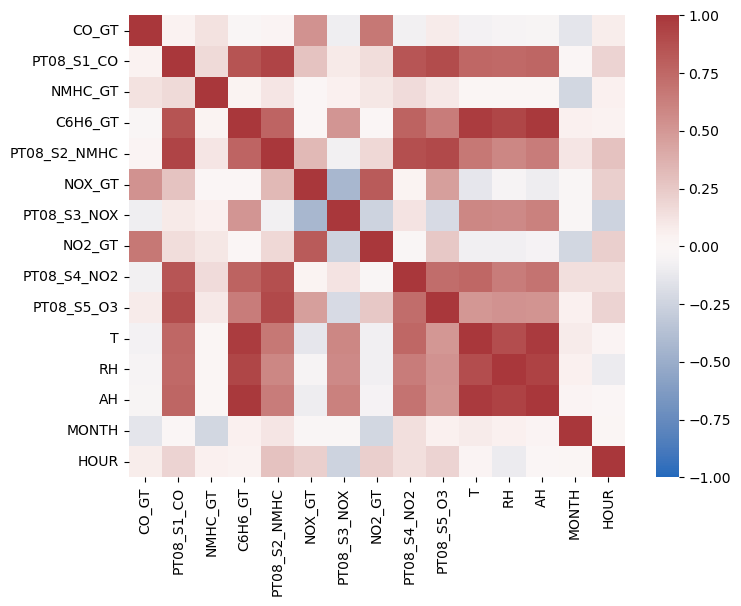

In [ ]:
ax= plt.subplots(figsize=(8,6))
sns.heatmap(df1.corr().round(3),annot=False,vmin=-1,vmax=1,cmap='vlag')

In [ ]:
# df1= df1.to_numpy()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [ ]:
col1=df1.columns.tolist()[2:]
X=df1[col1].drop('RH',1)     
Y=df1['RH']   
SScaler=StandardScaler()
Xsd=SScaler.fit_transform(X)    #applying stardardisation
X.head()

C:\Users\Sneh Omer\AppData\Local\Temp\ipykernel_19852\1560348009.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df1[col1].drop('RH',1)


,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,AH,MONTH,HOUR
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,0.757754,3,18
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,0.725487,3,19
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,0.750239,3,20
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,0.786713,3,21
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,0.788794,3,22


In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(Xsd,Y,test_size=0.2, random_state=3)

In [ ]:
X_train.shape

(7485, 14)

In [ ]:
Y_train.shape

(7485,)

In [ ]:
X_test.shape

(1872, 14)

In [ ]:
Y_test.shape

(1872,)

# MODEL 1

3 Hidden Layers 32>16>8 Nodes

In [ ]:
model1= Sequential()
model1.add(Dense(64, input_dim=14, activation='linear'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='tanh'))
model1.add(Dense(8, activation='linear'))
model1.add(Dense(1,activation='linear'))

In [ ]:
model1.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 64)                960       
                                                                 
 dense_115 (Dense)           (None, 32)                2080      
                                                                 
 dense_116 (Dense)           (None, 16)                528       
                                                                 
 dense_117 (Dense)           (None, 8)                 136       
                                                                 
 dense_118 (Dense)           (None, 1)                 9         
                                                                 
Total params: 3,713
Trainable params: 3,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer='adam',
             loss=tf.keras.losses.mean_squared_error)

In [ ]:
model1.fit(X_train,Y_train, epochs=50)

Epoch 1/50
234/234 [==============================] - 1s 1ms/step - loss: 2855.8298
Epoch 2/50
234/234 [==============================] - 0s 1ms/step - loss: 1388.5867
Epoch 3/50
234/234 [==============================] - 0s 1ms/step - loss: 1072.5610
Epoch 4/50
234/234 [==============================] - 0s 1ms/step - loss: 678.6399
Epoch 5/50
234/234 [==============================] - 0s 1ms/step - loss: 403.2687
Epoch 6/50
234/234 [==============================] - 0s 1ms/step - loss: 207.5913
Epoch 7/50
234/234 [==============================] - 0s 1ms/step - loss: 89.2469
Epoch 8/50
234/234 [==============================] - 0s 1ms/step - loss: 36.6582
Epoch 9/50
234/234 [==============================] - 0s 1ms/step - loss: 19.4229
Epoch 10/50
234/234 [==============================] - 0s 924us/step - loss: 15.2808
Epoch 11/50
234/234 [==============================] - 0s 973us/step - loss: 13.1248
Epoch 12/50
234/234 [==============================] - 0s 964us/step - loss: 12.655

In [ ]:
model1.evaluate(X_test, Y_test)

59/59 [==============================] - 0s 1ms/step - loss: 8.6011


8.601094245910645

# MODEL 2

3 Hidden Layers 50>25>10 Nodes

In [ ]:
model2= Sequential()
model2.add(Dense(100, input_dim=14, activation='linear'))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(25, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1,activation='linear'))

In [ ]:
model2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_119 (Dense)           (None, 100)               1500      
                                                                 
 dense_120 (Dense)           (None, 50)                5050      
                                                                 
 dense_121 (Dense)           (None, 25)                1275      
                                                                 
 dense_122 (Dense)           (None, 10)                260       
                                                                 
 dense_123 (Dense)           (None, 1)                 11        
                                                                 
Total params: 8,096
Trainable params: 8,096
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer='adam',
             loss=tf.keras.losses.mean_squared_error)

In [ ]:
model2.fit(X_train,Y_train, epochs=50)

Epoch 1/50
234/234 [==============================] - 1s 1ms/step - loss: 1573.5505
Epoch 2/50
234/234 [==============================] - 0s 1ms/step - loss: 196.6688
Epoch 3/50
234/234 [==============================] - 0s 1ms/step - loss: 91.3939
Epoch 4/50
234/234 [==============================] - 0s 1ms/step - loss: 47.6508
Epoch 5/50
234/234 [==============================] - 0s 1ms/step - loss: 32.4821
Epoch 6/50
234/234 [==============================] - 0s 1ms/step - loss: 26.2986
Epoch 7/50
234/234 [==============================] - 0s 1ms/step - loss: 23.2270
Epoch 8/50
234/234 [==============================] - 0s 1ms/step - loss: 20.2212
Epoch 9/50
234/234 [==============================] - 0s 1ms/step - loss: 18.1000
Epoch 10/50
234/234 [==============================] - 0s 2ms/step - loss: 16.9947
Epoch 11/50
234/234 [==============================] - 0s 2ms/step - loss: 15.9829
Epoch 12/50
234/234 [==============================] - 0s 2ms/step - loss: 15.4752
Epoch 13/5

In [ ]:
model1.evaluate(X_test, Y_test)

59/59 [==============================] - 0s 992us/step - loss: 8.6011


8.601094245910645

# MODEL 3

4 Hidden Layers 60>30>15>8 Nodes

In [ ]:
model3= Sequential()
model3.add(Dense(120, input_dim=14, activation='relu'))
model3.add(Dense(60, activation='relu'))
model3.add(Dense(30, activation='relu'))
model3.add(Dense(15, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1,activation='linear'))

In [ ]:
model3.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 120)               1800      
                                                                 
 dense_125 (Dense)           (None, 60)                7260      
                                                                 
 dense_126 (Dense)           (None, 30)                1830      
                                                                 
 dense_127 (Dense)           (None, 15)                465       
                                                                 
 dense_128 (Dense)           (None, 8)                 128       
                                                                 
 dense_129 (Dense)           (None, 1)                 9         
                                                                 
Total params: 11,492
Trainable params: 11,492
Non-tra

In [ ]:
model3.compile(optimizer='adam',
             loss=tf.keras.losses.mean_squared_error)

In [ ]:
model3.fit(X_train,Y_train, epochs=50)

Epoch 1/50
234/234 [==============================] - 1s 1ms/step - loss: 1461.5494
Epoch 2/50
234/234 [==============================] - 0s 1ms/step - loss: 156.4088
Epoch 3/50
234/234 [==============================] - 0s 2ms/step - loss: 86.2968
Epoch 4/50
234/234 [==============================] - 0s 2ms/step - loss: 50.3546
Epoch 5/50
234/234 [==============================] - 0s 2ms/step - loss: 33.9358
Epoch 6/50
234/234 [==============================] - 0s 2ms/step - loss: 27.8848
Epoch 7/50
234/234 [==============================] - 0s 1ms/step - loss: 22.4395
Epoch 8/50
234/234 [==============================] - 0s 1ms/step - loss: 21.6395
Epoch 9/50
234/234 [==============================] - 0s 1ms/step - loss: 18.0361
Epoch 10/50
234/234 [==============================] - 0s 1ms/step - loss: 18.3801
Epoch 11/50
234/234 [==============================] - 0s 1ms/step - loss: 15.2315
Epoch 12/50
234/234 [==============================] - 1s 2ms/step - loss: 15.0236
Epoch 13/5

In [ ]:
model3.evaluate(X_test, Y_test)

59/59 [==============================] - 0s 1ms/step - loss: 11.2404


11.240365028381348

# MODEL 4

4 Hidden Layers 100>50>20>10 Nodes

In [ ]:
model4= Sequential()
model4.add(Dense(200, input_dim=14, activation='relu'))
model4.add(Dense(100, activation='relu'))
model4.add(Dense(50, activation='relu'))
model4.add(Dense(20, activation='relu'))
model4.add(Dense(10, activation='relu'))
model4.add(Dense(1,activation='linear'))

In [ ]:
model4.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 200)               3000      
                                                                 
 dense_131 (Dense)           (None, 100)               20100     
                                                                 
 dense_132 (Dense)           (None, 50)                5050      
                                                                 
 dense_133 (Dense)           (None, 20)                1020      
                                                                 
 dense_134 (Dense)           (None, 10)                210       
                                                                 
 dense_135 (Dense)           (None, 1)                 11        
                                                                 
Total params: 29,391
Trainable params: 29,391
Non-tra

In [ ]:
model4.compile(optimizer='adam',
             loss=tf.keras.losses.mean_squared_error)

In [ ]:
model4.fit(X_train,Y_train, epochs=50)

Epoch 1/50
234/234 [==============================] - 1s 2ms/step - loss: 1141.6588
Epoch 2/50
234/234 [==============================] - 0s 2ms/step - loss: 82.5128
Epoch 3/50
234/234 [==============================] - 0s 2ms/step - loss: 42.4161
Epoch 4/50
234/234 [==============================] - 0s 2ms/step - loss: 28.1336
Epoch 5/50
234/234 [==============================] - 0s 2ms/step - loss: 22.4820
Epoch 6/50
234/234 [==============================] - 1s 2ms/step - loss: 18.0390
Epoch 7/50
234/234 [==============================] - 1s 2ms/step - loss: 16.5279
Epoch 8/50
234/234 [==============================] - 0s 1ms/step - loss: 15.2424
Epoch 9/50
234/234 [==============================] - 0s 1ms/step - loss: 13.6032
Epoch 10/50
234/234 [==============================] - 0s 1ms/step - loss: 13.4247
Epoch 11/50
234/234 [==============================] - 0s 1ms/step - loss: 12.7363
Epoch 12/50
234/234 [==============================] - 0s 1ms/step - loss: 12.0875
Epoch 13/50

In [ ]:
model4.evaluate(X_test, Y_test)

59/59 [==============================] - 0s 2ms/step - loss: 7.7481


7.748126029968262

# MODEL 5

5 Hidden Layers 150>100>65>30>10 Nodes

In [ ]:
model5= Sequential()
model5.add(Dense(200, input_dim=14, activation='relu'))
model5.add(Dense(150, activation='relu'))
model5.add(Dense(100, activation='relu'))
model5.add(Dense(65, activation='relu'))
model5.add(Dense(30, activation='relu'))
model5.add(Dense(10, activation='relu'))
model5.add(Dense(1,activation='linear'))

In [ ]:
model5.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (None, 200)               3000      
                                                                 
 dense_137 (Dense)           (None, 150)               30150     
                                                                 
 dense_138 (Dense)           (None, 100)               15100     
                                                                 
 dense_139 (Dense)           (None, 65)                6565      
                                                                 
 dense_140 (Dense)           (None, 30)                1980      
                                                                 
 dense_141 (Dense)           (None, 10)                310       
                                                                 
 dense_142 (Dense)           (None, 1)               

In [ ]:
model5.compile(optimizer='adam',
             loss=tf.keras.losses.mean_squared_error)

In [ ]:
model5.fit(X_train,Y_train, epochs=50)

Epoch 1/50
234/234 [==============================] - 2s 3ms/step - loss: 796.9160
Epoch 2/50
234/234 [==============================] - 0s 2ms/step - loss: 70.1178
Epoch 3/50
234/234 [==============================] - 0s 2ms/step - loss: 33.1530
Epoch 4/50
234/234 [==============================] - 0s 2ms/step - loss: 23.6359
Epoch 5/50
234/234 [==============================] - 0s 2ms/step - loss: 18.8695
Epoch 6/50
234/234 [==============================] - 0s 2ms/step - loss: 15.1235
Epoch 7/50
234/234 [==============================] - 0s 2ms/step - loss: 16.9656
Epoch 8/50
234/234 [==============================] - 0s 2ms/step - loss: 14.0244
Epoch 9/50
234/234 [==============================] - 0s 2ms/step - loss: 13.2052
Epoch 10/50
234/234 [==============================] - 0s 2ms/step - loss: 12.3557
Epoch 11/50
234/234 [==============================] - 0s 2ms/step - loss: 12.9324
Epoch 12/50
234/234 [==============================] - 0s 2ms/step - loss: 11.5280
Epoch 13/50


In [ ]:
model5.evaluate(X_test, Y_test)

59/59 [==============================] - 0s 1ms/step - loss: 7.9045


7.904499053955078

________________________________________________________________________________________________________________________________

# CONCLUSION : Minimum Loss and Error is in MODEL-4.